In [143]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo


 Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos
 reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:
 
 1. Preparación de Datos:

 Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.
 

In [37]:
## leemos el csv

df= pd.read_csv('data/datos_final.csv', index_col=0)

In [38]:
df.head(3)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152,0,0,alberta,edmonton,t9g 1w3,female,bachelor,92552,married,aurora,7919,standard,2016,8,0,0
1,100102,2017,1,10,4,14,2030,203,0,0,ontario,toronto,m1r 4k3,male,college,71800,single,nova,2887,standard,2013,3,0,0
2,100140,2017,1,6,0,6,1200,120,0,0,british columbia,dawson creek,u5i 4f1,female,college,71800,divorced,nova,2838,standard,2016,7,0,0


In [39]:
# Filtramos para hacer el análisis las columnas que necesitamos

df_test = df[['flights_booked', 'education']]

df_test.head(3)

,flights_booked,education
0,3,bachelor
1,10,college
2,6,college


In [40]:
# miramos los valores únicos de la columna education 

df_test['education'].unique()

array(['bachelor', 'college', 'master', 'high school or below', 'doctor'],
      dtype=object)

In [41]:
# Voy a dividir la columna education en dos grupos

def categorizar_educacion(valor):
    
    """
    Categoriza la edad en grupos específicos.

    Esta función toma como entrada un número que representa la edad y devuelve una categoría
    específica basada en el rango de edad.

    Args:
    ----------
    numero : int
        La edad que se desea categorizar.

    Returns:
    ------------
    str
        Una cadena que representa la categoría de edad a la que pertenece el número.

    """
    if valor == 'bachelor'  or valor == 'college' or valor == 'high school or below' :
        return "Estdios no universitarios"
    
    else :
        return "Estudios Superiores"




In [42]:
# Creamos una columna nueva y aplicamos la función que hemos creado con anterioridad

df_test['cat_edu'] = df["education"].apply(categorizar_educacion)

df_test.sample(5)

,flights_booked,education,cat_edu
31077,0,bachelor,Estdios no universitarios
268892,3,college,Estdios no universitarios
365695,4,master,Estudios Superiores
116901,0,college,Estdios no universitarios
215571,0,bachelor,Estdios no universitarios


In [127]:
#Hacemos un data frame por cada uno de los grupos

df_uni = df_test[df_test['cat_edu'] == 'Estdios no universitarios']['flights_booked']
df_nouni = df_test[df_test['cat_edu'] == 'Estudios Superiores']['flights_booked']


 2. Análisis Descriptivo:

 Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
 número de vuelos reservados para cada grupo.

In [129]:

def mirar_estadisticas(df):
    
    
    print(f'La número de valores que hay en este grupo  {df.count()}')
    print('======================================================')

    print(f'La media es {round(df.mean(),2)}')
    print('======================================================')

    print(f'La mediana es {round(df.median(),2)}')
    print('======================================================')

    print(f'La moda es {df.mode()}')
    print('======================================================')

    print(f'La varianza es {round(df.var(),2)}')
    print('======================================================')

    print(f'La desviación estandar {round(df.std(),2)}')
    print('======================================================')

    print(f'El percentile 25% {np.percentile(df, 25)}')
    print('======================================================')

    print(f'El percentile 50% {np.percentile(df, 50)}')
    print('======================================================')

    print(f'El percentile 75% {np.percentile(df, 75)}')
    print('======================================================')

    print(f'El valor máxímo {df.max()}')
    print('======================================================')

    print(f'El valor mínimo {df.min()}')
    print('======================================================')




In [130]:
#miramos los datos estadísticos para el grupo universitarios

mirar_estadisticas(df_uni)

La número de valores que hay en este grupo  375432
La media es 4.11
La mediana es 1.0
La moda es 0    0
Name: flights_booked, dtype: int64
La varianza es 27.3
La desviación estandar 5.22
El percentile 25% 0.0
El percentile 50% 1.0
El percentile 75% 8.0
El valor máxímo 21
El valor mínimo 0


In [131]:
# También lo podemos hacer con el describe

df_uni.describe()

count    375432.000000
mean          4.111301
std           5.224839
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          21.000000
Name: flights_booked, dtype: float64

In [132]:
#miramos los datos estadísticos para el grupo no universitarios

mirar_estadisticas(df_nouni)

La número de valores que hay en este grupo  30192
La media es 4.16
La mediana es 1.0
La moda es 0    0
Name: flights_booked, dtype: int64
La varianza es 27.39
La desviación estandar 5.23
El percentile 25% 0.0
El percentile 50% 1.0
El percentile 75% 8.0
El valor máxímo 21
El valor mínimo 0


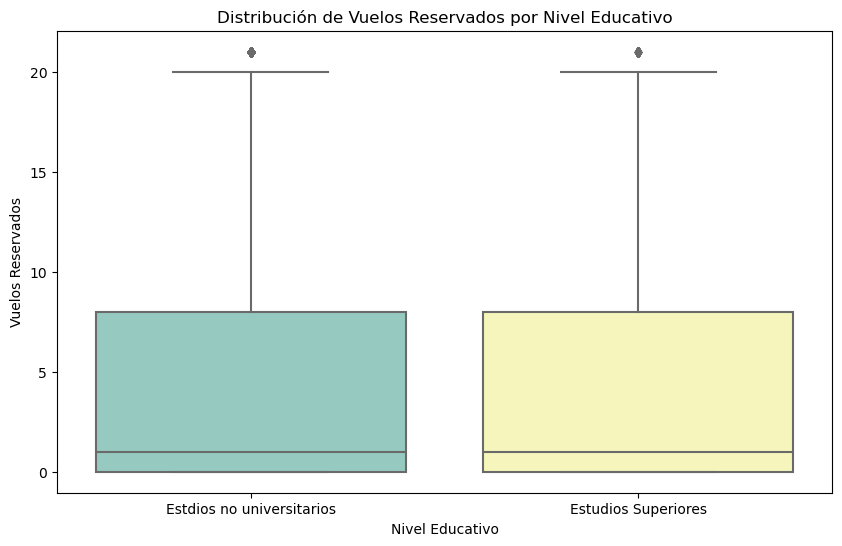

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='cat_edu', y='flights_booked', data=df_test, palette='Set3')
plt.xlabel('Nivel Educativo')
plt.ylabel('Vuelos Reservados')
plt.title('Distribución de Vuelos Reservados por Nivel Educativo')
plt.show()

 3. Prueba Estadística:

 Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
 niveles educativos

In [ ]:
# primero tenemos que saber si es por proporciones o media
    # no es proporciones porque tiene valor númericos
    # Así que tenemos que seguir el flojo de trabajo media
        # Realizamos prueba de normalidad
        # Realizamos prueba de homogeniedad



In [145]:
# Realizar una prueba de normalidad (usando la prueba de Shapiro-Wilk)

p_value = shapiro(df_test['flights_booked']).pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos no se ajustan a una distribución normal (p-value = 0.0 )


Como no se ajusta a una distribución normal tendremos que hacer la prueba man_whitney

In [167]:
def homogeneidad (dataframe, columna, columna_metrica):
    
    """
    Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna que se utilizará para dividir los datos en grupos.
    - columna_metrica (str): El nombre de la columna que se utilizará para evaluar la homogeneidad de las varianzas.

    Returns:
    No devuelve nada directamente, pero imprime en la consola si las varianzas son homogéneas o no entre los grupos.
    Se utiliza la prueba de Levene para evaluar la homogeneidad de las varianzas. Si el valor p resultante es mayor que 0.05,
    se concluye que las varianzas son homogéneas; de lo contrario, se concluye que las varianzas no son homogéneas.
    """
    
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

    
homogeneidad(df_test, 'cat_edu', 'flights_booked')

Para la métrica flights_booked las varianzas son homogéneas entre grupos.


In [175]:


# Realizar la prueba de chi-cuadrado para evaluar la independencia de dos variables categóricas
contingency_table = pd.crosstab(df_test['cat_edu'], df['flights_booked'])
chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
print(f"Prueba de Chi-cuadrado - p-valor: {p_chi2}")

# Realizar una prueba t para comparar las medias de dos grupos (por ejemplo, Control vs. Test)
control_group = df_test[df_test['cat_edu'] == 'Estdios no universitarios']
test_group = df_test[df_test['cat_edu'] == 'Estudios Superiores']
t_stat, p_ttest = ttest_ind(control_group['flights_booked'], test_group['flights_booked'])
print(f"Prueba t para CTR entre Control y Test - p-valor: {p_ttest}")



Prueba de Chi-cuadrado - p-valor: 0.03817426968200615
Prueba t para CTR entre Control y Test - p-valor: 0.10691111643121602


Conclusión General
Prueba de Chi-cuadrado: Hay una relación significativa entre el nivel educativo y el número de vuelos reservados.
Prueba t: No hay una diferencia significativa en la media del número de vuelos reservados entre los dos grupos de estudio.
Esto puede indicar que, aunque el nivel educativo tiene algún impacto en la distribución de los vuelos reservados (como puede ser que un grupo tenga más variabilidad en las reservas), las medias de las reservas entre los grupos no son significativamente diferentes. Esto podría ser útil para ajustar estrategias o políticas específicas según el nivel educativo.

In [165]:
# vamos a crear una función para calcular este test y ver si hay diferencias entre los grupos de estudio

def test_man_whitney(dataframe, columnas_metricas, grupo_control, grupo_test, columna_grupos = "cat_edu"):

    """
    Realiza la prueba de Mann-Whitney U para comparar las medianas de las métricas entre dos grupos en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columnas_metricas (list): Una lista de nombres de columnas que representan las métricas a comparar entre los grupos.
    - grupo_control (str): El nombre del grupo de control en la columna especificada por columna_grupos.
    - grupo_test (str): El nombre del grupo de test en la columna especificada por columna_grupos.
    - columna_grupos (str): El nombre de la columna que contiene la información de los grupos. Por defecto, "campaign_name".

    Returns 
    No devuelve nada directamente, pero imprime en la consola si las medianas son diferentes o iguales para cada métrica.
    Se utiliza la prueba de Mann-Whitney U para evaluar si hay diferencias significativas entre los grupos.
    """
    # filtramos el DataFrame para quedarnos solo con los datos de control
    control = dataframe[dataframe[columna_grupos] == grupo_control]
    
    # filtramos el DataFrame para quedarnos solo con los datos de control
    test = dataframe[dataframe[columna_grupos] == grupo_test]
    
        
    # filtrams el conjunto de datos para quedarnos solo con la columna de la metrica que nos interesa
    metrica_control = control[columnas_metricas]
    metrica_test = test[columnas_metricas]
        
        # aplicamos el estadístico
    u_statistic, p_value = stats.mannwhitneyu(metrica_control, metrica_test)
        
    if p_value < 0.05:
            print(f"Para la métrica {columnas_metricas}, las medianas son diferentes.")
    else:
            print(f"Para la métrica {columnas_metricas}, las medianas son iguales.")
            
    

## llamamos a la función
test_man_whitney(df_test, 'flights_booked', 'Estdios no universitarios', 'Estudios Superiores' )

Para la métrica flights_booked, las medianas son diferentes.


In [ ]:
# Se realizó una prueba de Mann-Whitney U para comparar el número de vuelos reservados entre grupos con distintos niveles educativos: 'universitario' y 'no_universitario'. 
# Los resultados indican que hay una diferencia significativa en las medianas de vuelos reservados entre estos grupos (p < 0.05). 
# Esto sugiere que las estrategias de marketing y promoción pueden necesitar ser ajustadas para abordar las diferentes necesidades y comportamientos de estos segmentos de clientes.
